<a href="https://colab.research.google.com/github/harshankbansal/pytorch-deep-learning/blob/main/lectures/07_experimentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tracking Experiments

With ML projects, we usually train 20+ models, and which introduces a different set of problems. Tracking of these experiments is important and there are various tools just for this

1. In built pytorch's board
2. 3rd party tools like weights and bias https://wandb.ai/site/
3. mlflow - another 3rd party

there are many more solutsion

In [1]:
# Set up imports. Thanks to python it is unnecessarily complicated
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if not IN_COLAB:
    try:
        from going_modular.going_modular import data_setup, engine
    except ImportError:
        import os
        import sys
        from pathlib import Path
        sys.path.append(str(Path(os.path.abspath('')).parent))
        from going_modular.going_modular import data_setup
else:
    try:
        from going_modular.going_modular import data_setup, engine
    except:
        # Get the going_modular scripts
        print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
        !git clone https://github.com/harshankbansal/pytorch-deep-learning
        !mv pytorch-deep-learning/going_modular .
        !mv pytorch-deep-learning/helper_functions.py .
        # !mv pytorch-deep-learning/data .
        !rm -rf pytorch-deep-learning
        from going_modular.going_modular import data_setup, engine
    try:
      from torchinfo import summary
    except ImportError:
      !pip install torchinfo
      from torchinfo import summary

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4390, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 4390 (delta 31), reused 25 (delta 20), pack-reused 4343 (from 2)
Receiving objects: 100% (4390/4390), 762.56 MiB | 38.98 MiB/s, done.
Resolving deltas: 100% (2660/2660), done.
Updating files: 100% (257/257), done.


In [2]:
import torchvision
import torch
import matplotlib.pyplot as plt
from torchinfo import summary
from helper_functions import download_data
from torchvision import models

device = "cuda" if torch.cuda.is_available() else "cpu"

## 1. Getting model and image transformers

In [3]:
#Download Data
image_dir = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                         destination="pizza_steak_sushi")
test_images_dir = image_dir/"test"
train_images_dir = image_dir/"train"

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


In [4]:
weights = models.EfficientNet_B0_Weights.DEFAULT
image_transformers = weights.transforms()

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_images_dir,
    test_dir=test_images_dir,
    transform=image_transformers,
    batch_size=16
)

len(train_dataloader), len(test_dataloader), class_names, image_transformers

(15,
 5,
 ['pizza', 'steak', 'sushi'],
 ImageClassification(
     crop_size=[224]
     resize_size=[256]
     mean=[0.485, 0.456, 0.406]
     std=[0.229, 0.224, 0.225]
     interpolation=InterpolationMode.BICUBIC
 ))

## 2 Setting up pre trained model ready for training

In [5]:
model = models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 131MB/s] 


In [6]:
def print_model(model: torch.nn.Module = model):
    sum = summary(
        model=model,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=17,
        row_settings=["var_names"]
    )
    print(sum)
    return sum

In [7]:
print_model(model)

Layer (type (var_name))                                      Input Shape       Output Shape      Param #           Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]  [1, 1000]         --                True
├─Sequential (features)                                      [1, 3, 224, 224]  [1, 1280, 7, 7]   --                True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]  [1, 32, 112, 112] --                True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]  [1, 32, 112, 112] 864               True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112] [1, 32, 112, 112] 64                True
│    │    └─SiLU (2)                                         [1, 32, 112, 112] [1, 32, 112, 112] --                --
│    └─Sequential (1)                                        [1, 32, 112, 112] [1, 16, 112, 112] --                True
│    │    └─MBConv (0)               

Layer (type (var_name))                                      Input Shape       Output Shape      Param #           Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]  [1, 1000]         --                True
├─Sequential (features)                                      [1, 3, 224, 224]  [1, 1280, 7, 7]   --                True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]  [1, 32, 112, 112] --                True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]  [1, 32, 112, 112] 864               True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112] [1, 32, 112, 112] 64                True
│    │    └─SiLU (2)                                         [1, 32, 112, 112] [1, 32, 112, 112] --                --
│    └─Sequential (1)                                        [1, 32, 112, 112] [1, 16, 112, 112] --                True
│    │    └─MBConv (0)               

In [8]:
for param in model.features.parameters():
  param.requires_grad = False

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280, out_features=3, bias=True)
)

print_model()

Layer (type (var_name))                                      Input Shape       Output Shape      Param #           Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]  [1, 3]            --                Partial
├─Sequential (features)                                      [1, 3, 224, 224]  [1, 1280, 7, 7]   --                False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]  [1, 32, 112, 112] --                False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]  [1, 32, 112, 112] (864)             False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112] [1, 32, 112, 112] (64)              False
│    │    └─SiLU (2)                                         [1, 32, 112, 112] [1, 32, 112, 112] --                --
│    └─Sequential (1)                                        [1, 32, 112, 112] [1, 16, 112, 112] --                False
│    │    └─MBConv (0)       

Layer (type (var_name))                                      Input Shape       Output Shape      Param #           Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]  [1, 3]            --                Partial
├─Sequential (features)                                      [1, 3, 224, 224]  [1, 1280, 7, 7]   --                False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]  [1, 32, 112, 112] --                False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]  [1, 32, 112, 112] (864)             False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112] [1, 32, 112, 112] (64)              False
│    │    └─SiLU (2)                                         [1, 32, 112, 112] [1, 32, 112, 112] --                --
│    └─Sequential (1)                                        [1, 32, 112, 112] [1, 16, 112, 112] --                False
│    │    └─MBConv (0)       

In [9]:
# I incorporated the SummaryWritter for experiment trackinging in helper_functions.py's PytorchModelTrainer
# Here is how it works though

# from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter()
# writer.add_text('Model Summary', str(print_model(model)))
# for epoch in epochs:
#   model.train()
#   ...
#   # train loop
#   #calculate loss
#   writer.add_scalar("Loss/Train", loss.item(), epoch)
#   writter.add_scalar("Accuracy/Train" ...)

In [10]:
from helper_functions import PytorchModelTranier

trainer = PytorchModelTranier(
    name='v0_pretrained_effnet_b0',
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    lr=0.001
)

In [15]:
trainer.train(3)

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1/3 Train Loss: 0.6237 | Train Acc: 83.75% Test Loss: 0.5839 | Test Acc: 84.43%
Epoch 2/3 Train Loss: 0.5571 | Train Acc: 81.25% Test Loss: 0.5210 | Test Acc: 83.86%
Epoch 3/3 Train Loss: 0.4615 | Train Acc: 92.50% Test Loss: 0.4684 | Test Acc: 85.11%


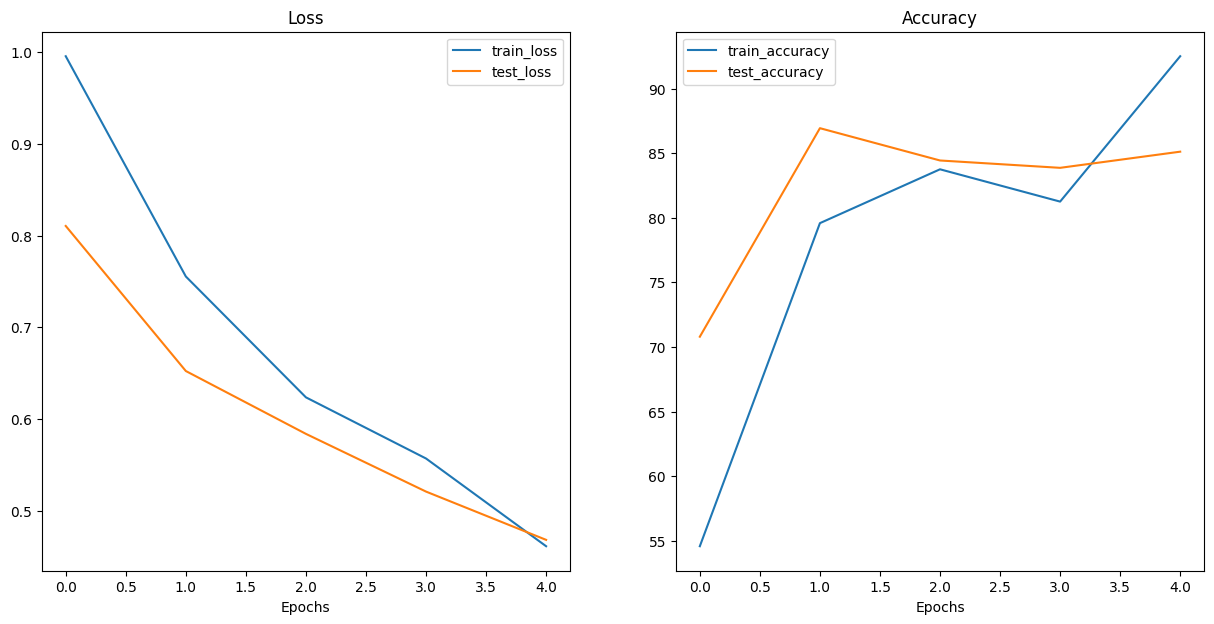

In [16]:
trainer.plot_losses()